# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as p
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [62]:
from sklearn.ensemble import RandomForestRegressor
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here
ds=pd.read_csv("C:/Users/haenni/Documents/GitHub/lab-problems-in-ml/data/boston_data.csv")

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [11]:
# Your plots here
ds.corr()['medv'].nlargest(3)

medv     1.000000
rm       0.683541
black    0.360071
Name: medv, dtype: float64

In [ ]:
ds.corr()['medv'].nsmallest(2)

In [ ]:
reg= ['rm', 'lstat', 'ptratio']

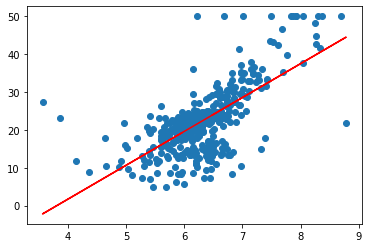

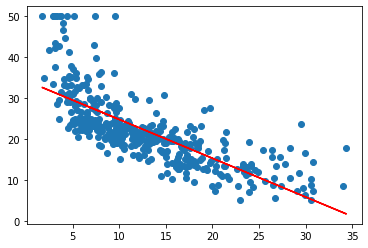

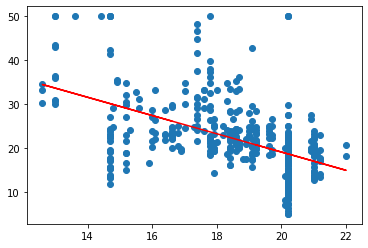

In [17]:
for x in reg: 
    X = ds[x]
    Y = ds['medv']

    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

    Y_pred = intercept + slope * ds[x]
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
# 'rm', outliers at the bottom and at the top
#'lstat', seems very strong negative correlation
#'ptratio': catgorical variable, but relation maybe not linear

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

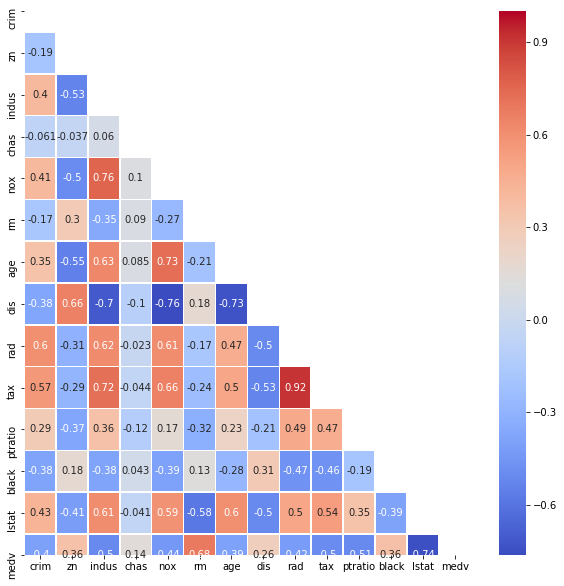

In [18]:
# Your response here
plt.figure(figsize =(10,10))
corr = ds.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, linewidth=0.5, mask=mask)


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [19]:
# Your code here
ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    print ("linear aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("linear MSE: ",mean_squared_error(y_test, y_pred))
    print ("linear R2: ",r2_score(y_test, y_pred), "\n")

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [25]:
listX= list(ds.columns)
listX.remove('medv')

In [26]:
X = ds[listX]

y= ds['medv']

In [30]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [ ]:
RandomForestRegressor

In [43]:
# Five separate RFR here with the given max depths

for k in range (2,11,2):
    RFR = RandomForestRegressor(max_depth=k)
    RFR.fit(X_train, y_train)
    y_pred = RFR.predict(X_test)
    print (k)
    performance_metric(y_train, y_pred)


2
linear aMSE:  3.6028754713407807
linear MSE:  23.108925574299526
linear R2:  0.6840469490451282 

4
linear aMSE:  2.8563904196925325
linear MSE:  15.663183790463833
linear R2:  0.7858476504953671 

6
linear aMSE:  2.7369757929184453
linear MSE:  14.129763856032532
linear R2:  0.8068130867775891 

8
linear aMSE:  2.6706246656219768
linear MSE:  13.394240692464559
linear R2:  0.8168694083850174 

10
linear aMSE:  2.388997361285765
linear MSE:  10.745715737292267
linear R2:  0.8530809378837084 



C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

Now, plot the score for each tree on the training set and on the testing set.

In [52]:
# Produce a plot with the score for the testing and training for the different max depths
from sklearn.pipeline import make_pipeline

for k in range (2,11,2):
    RFR = RandomForestRegressor(max_depth=k)
    RFR.fit(X_train, y_train)
    y_pred = RFR.predict(X_test)
    print (k)
    #performance_metric(y_train, y_pred)

    print('Score train: ',  RFR.score(X_test, y_test))
    print('Score test: ',  RFR.score(X_train, y_train))



2
Score train:  0.7629505848254339
Score test:  0.7696799872244007
4
Score train:  0.776145304263341
Score test:  0.9033298748687093
6
Score train:  0.8309061749139501
Score test:  0.9509755110581323
8
Score train:  0.8145495991229388
Score test:  0.9599935413049777
10
Score train:  0.8094554709857058
Score test:  0.9684115866295218


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
### score gets higher with more depth for the test sample
## but for the training sample the best is with 6 max dept

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [53]:
# Your response here
'''
The bias error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
The variance is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

'''

## with 1 it ist high bias --> underfitting
## with 10 it is high variance --> overfitting. this is also the reason why the r score gets smaller with higher max_depth


'\nThe bias error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).\nThe variance is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).\n\n'

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [66]:
# Your response here

param_grid={'max_depth': range (2,11)}
RFR = RandomForestRegressor()
RFR_cv = GridSearchCV(RFR, param_grid)#eed = True,
RFR_cv.fit(X_train, y_train)
RFR_cv.best_params_



C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in 

{'max_depth': 8}

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here

## datas are too old
## features are enough
## robust? check cross validity (see bellow) not the same r 2 for all the subsets , esepcially not the last one. 
## check for other city, probably not sure if it si applicable, because setting is different


In [69]:
RFR = RandomForestRegressor(max_depth=8)
RFR.fit(X_train, y_train)
cv_results = cross_val_score(RFR, X, y, cv=5) 
cv_results

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.81063539, 0.77161262, 0.81098551, 0.86192516, 0.75940893])